# Load Finantial Data

In [32]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.4f}'.format

In [2]:
start = "2014-10-01"
end = "2021-05-31"
symbol = ["MSFT", "^DJI", "EURUSD=X", "BTC-USD"]

# Download data and store as pandas df
df = yf.download(symbol, start, end)
df.head()

[*********************100%%**********************]  4 of 4 completed


Price      Adj Close                                Close                   \
Ticker       BTC-USD EURUSD=X    MSFT       ^DJI  BTC-USD EURUSD=X    MSFT   
Date                                                                         
2014-10-01  383.6150   1.2628 39.3870 16804.7109 383.6150   1.2628 45.9000   
2014-10-02  375.0720   1.2624 39.2669 16801.0508 375.0720   1.2624 45.7600   
2014-10-03  359.5120   1.2671 39.5501 17009.6895 359.5120   1.2671 46.0900   
2014-10-04  328.8660      NaN     NaN        NaN 328.8660      NaN     NaN   
2014-10-05  320.5100      NaN     NaN        NaN 320.5100      NaN     NaN   

Price                     High           ...     Low                Open  \
Ticker           ^DJI  BTC-USD EURUSD=X  ...    MSFT       ^DJI  BTC-USD   
Date                                     ...                               
2014-10-01 16804.7109 391.3790   1.2640  ... 45.8500 16776.1309 387.4270   
2014-10-02 16801.0508 385.4970   1.2691  ... 45.6400 16674.0391 383.9880   
2014-10-03 17009.6895 377.6950   1.2670  ... 45.6100 16802.1992 375.1810   
2014-10-04        NaN 364.4870      NaN  ...     NaN        NaN 359.8920   
2014-10-05        NaN 341.8010      NaN  ...     NaN        NaN 328.9160   

Price                                     Volume                         \
Ticker     EURUSD=X    MSFT       ^DJI   BTC-USD EURUSD=X          MSFT   
Date                                                                      
2014-10-01   1.2629 46.2700 17040.4609  26229400   0.0000 38088400.0000   
2014-10-02   1.2625 45.8300 16808.2695  21777700   0.0000 25119400.0000   
2014-10-03   1.2670 45.9800 16802.1992  30901200   0.0000 32453200.0000   
2014-10-04      NaN     NaN        NaN  47236500      NaN           NaN   
2014-10-05      NaN     NaN        NaN  83308096      NaN           NaN   

Price                      
Ticker               ^DJI  
Date                       
2014-10-01 104240000.0000  
2014-10-02  75490000.0000  
2014-10-03  87940000.0000  
2014-10-04            NaN  
2014-10-05            NaN  

[5 rows x 24 columns]

In [3]:
# Swap column index to group stock type together
df_swap = df.swaplevel(axis="columns").sort_index(axis="columns")
df_swap.head()

Ticker       BTC-USD                                                EURUSD=X  \
Price      Adj Close    Close     High      Low     Open    Volume Adj Close   
Date                                                                           
2014-10-01  383.6150 383.6150 391.3790 380.7800 387.4270  26229400    1.2628   
2014-10-02  375.0720 375.0720 385.4970 372.9460 383.9880  21777700    1.2624   
2014-10-03  359.5120 359.5120 377.6950 357.8590 375.1810  30901200    1.2671   
2014-10-04  328.8660 328.8660 364.4870 325.8860 359.8920  47236500       NaN   
2014-10-05  320.5100 320.5100 341.8010 289.2960 328.9160  83308096       NaN   

Ticker                           ...    MSFT                                \
Price       Close   High    Low  ...    High     Low    Open        Volume   
Date                             ...                                         
2014-10-01 1.2628 1.2640 1.2586  ... 46.5300 45.8500 46.2700 38088400.0000   
2014-10-02 1.2624 1.2691 1.2616  ... 46.1000 45.6400 45.8300 25119400.0000   
2014-10-03 1.2671 1.2670 1.2502  ... 46.3000 45.6100 45.9800 32453200.0000   
2014-10-04    NaN    NaN    NaN  ...     NaN     NaN     NaN           NaN   
2014-10-05    NaN    NaN    NaN  ...     NaN     NaN     NaN           NaN   

Ticker           ^DJI                                              \
Price       Adj Close      Close       High        Low       Open   
Date                                                                
2014-10-01 16804.7109 16804.7109 17041.1602 16776.1309 17040.4609   
2014-10-02 16801.0508 16801.0508 16857.2500 16674.0391 16808.2695   
2014-10-03 17009.6895 17009.6895 17027.8398 16802.1992 16802.1992   
2014-10-04        NaN        NaN        NaN        NaN        NaN   
2014-10-05        NaN        NaN        NaN        NaN        NaN   

Ticker                     
Price              Volume  
Date                       
2014-10-01 104240000.0000  
2014-10-02  75490000.0000  
2014-10-03  87940000.0000  
2014-10-04            NaN  
2014-10-05            NaN  

[5 rows x 24 columns]

# Visualization

Given the diverse value ranges among stocks, we'll standardize them by setting the first value as a reference point. Due to Bitcoin's heightened volatility compared to other stocks, we opt for a logarithmic scale to enhance visualization and facilitate data comparison.

In [4]:
df_norm = df.div(df.iloc[0])
df_norm.head()

Price      Adj Close                          Close                         \
Ticker       BTC-USD EURUSD=X   MSFT   ^DJI BTC-USD EURUSD=X   MSFT   ^DJI   
Date                                                                         
2014-10-01    1.0000   1.0000 1.0000 1.0000  1.0000   1.0000 1.0000 1.0000   
2014-10-02    0.9777   0.9997 0.9969 0.9998  0.9777   0.9997 0.9969 0.9998   
2014-10-03    0.9372   1.0033 1.0041 1.0122  0.9372   1.0033 1.0041 1.0122   
2014-10-04    0.8573      NaN    NaN    NaN  0.8573      NaN    NaN    NaN   
2014-10-05    0.8355      NaN    NaN    NaN  0.8355      NaN    NaN    NaN   

Price         High           ...    Low           Open                         \
Ticker     BTC-USD EURUSD=X  ...   MSFT   ^DJI BTC-USD EURUSD=X   MSFT   ^DJI   
Date                         ...                                                
2014-10-01  1.0000   1.0000  ... 1.0000 1.0000  1.0000   1.0000 1.0000 1.0000   
2014-10-02  0.9850   1.0040  ... 0.9954 0.9939  0.9911   0.9997 0.9905 0.9864   
2014-10-03  0.9650   1.0024  ... 0.9948 1.0016  0.9684   1.0032 0.9937 0.9860   
2014-10-04  0.9313      NaN  ...    NaN    NaN  0.9289      NaN    NaN    NaN   
2014-10-05  0.8733      NaN  ...    NaN    NaN  0.8490      NaN    NaN    NaN   

Price       Volume                         
Ticker     BTC-USD EURUSD=X   MSFT   ^DJI  
Date                                       
2014-10-01  1.0000      NaN 1.0000 1.0000  
2014-10-02  0.8303      NaN 0.6595 0.7242  
2014-10-03  1.1781      NaN 0.8520 0.8436  
2014-10-04  1.8009      NaN    NaN    NaN  
2014-10-05  3.1761      NaN    NaN    NaN  

[5 rows x 24 columns]

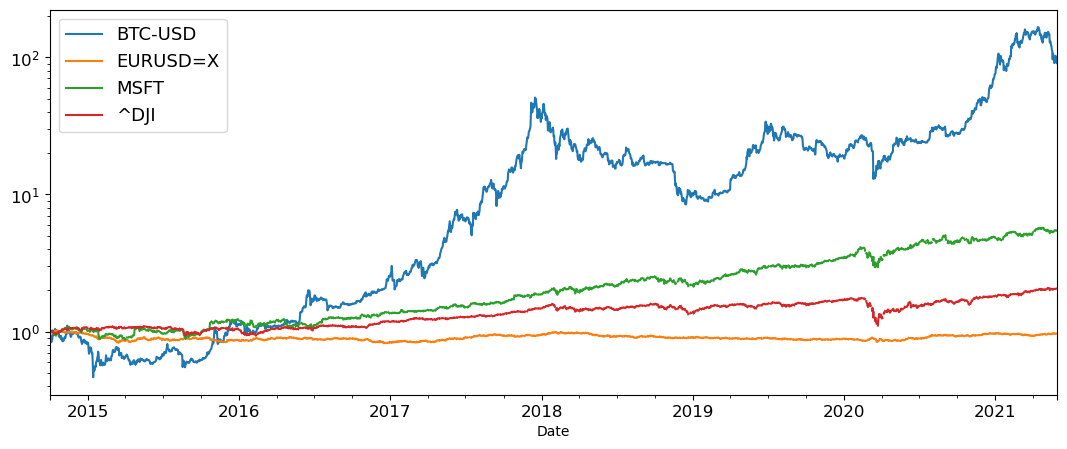

In [5]:
df_norm.Close.plot(figsize=(13, 5), fontsize=12, logy=True)
plt.legend(fontsize = 13)
plt.show()

> Absolute prices are not comparable, higher price does not mean higher return. Scaling data helps evaluate different financial instruments performance

# Daily Return

We use Microsoft `MSFT` close price for daily return analysis
- __Absolute Price Changes__ (Difference)
$$\text{Absolute Daily Return} = \text{Today Close Price} - \text{Yesterday Close Price}$$
- __Relative/Percentage Price Changes__ (Returns)
$$\text{Simple Daily Return} = \frac {\text{Today Close Price}} {\text{Yesterday Close Price}}$$

> Relative Price Changes (Simple Returns) are meaningful and comparable across instruments

In [6]:
# Get msft data
msft = df_swap.MSFT.copy().Close.dropna().to_frame().rename(columns={"Close": "Price"})

In [7]:
# Relative Daily return
msft["Return"] = msft.pct_change(periods=1)
msft.head()

,Price,Return
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122


In [8]:
msft.describe()

,Price,Return
count,1677.0000,1676.0000
mean,106.3144,0.0012
std,60.7722,0.0173
min,40.2900,-0.1474
25%,54.8300,-0.0062
50%,89.7100,0.0009
75%,138.9000,0.0091
max,261.9700,0.1422


# Investment Multiple and CAGR

**Investment Multiple** is a financial metric indicating the level of profitability or return on investment achieved
$$\text{Multiple} = \frac{\text{Ending Price}}{\text{Initial Investment Price}}=\prod _ {\forall i} (1 + \text{Today Price} - \text{Yesterday Price})$$

**Compound Annual Growth Rate** (CAGR) is the constant annual rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each **year** of the investment's lifespan
$$\text{CAGR} = \text{Multiple} ^ {1/t} - 1$$
where $t$ is in years and assume there are 365.25 days per year 

**Geometric Mean Return** is simillar to CAGR but $t$ can be in other units
$$\text{Geometric Mean} = \text{Multiple} ^ {1/t} - 1$$
$$\text{Multiple} = ({\text{Geometric Mean} + 1} )^ {t}$$

In [9]:
# Calcualte investment multiple
multiple = msft["Price"].iloc[-1] / msft["Price"].iloc[0]
print("Investment Multiple = %.5f" %multiple)

Investment Multiple = 5.43965


In [10]:
# Calculate the number of years from start to end
t_year = (msft.index[-1] - msft.index[0]) 
t_year = t_year.days / 365.25
# Calculate compound annual growth rate
cagr = multiple ** (1 / t_year) - 1
print("CAGR = %.5f" %cagr)

CAGR = 0.28978


In [14]:
# Alternative way to calculate multiple
multiple = (1 + msft.Return).prod()
# Daily geometric mean return
geo_mean = multiple ** (1 / msft.Return.count()) - 1
print("Daily geometric mean return = %.5f" %geo_mean)

Daily geometric mean return = 0.00101


# Log Return Analysis on Time Series
## Discrete Compounding
Converting a nominal interest rate into an effective interest rate is
$$i_{\text{per period}} = \left( 1 + \frac{r}{m} \right) ^ m -1$$
Where:
- $i_{\text{per period}}$ is the effective interest rate for a certain period
- $r$ is the nominal interest rate for that period
- $m$ is the number of times interest is compounded in that same period

Future value calculation:
$$\text{FV} = \text{PV} (1 + i_{\text{per period}})^n = \text{PV} \left(1 + \frac{r}{m} \right) ^ {m * n}$$
Where:
- $n$ is the number of periods

**Example**: A Saving Bank offers an interest rate of __8% APR__ with __monthly compounding__ (__$100__). Calculate the __value__ of the savings account __after one year__ and the corresponding __effective annual interest rate__.

In [35]:
PV = 100    # Present value
r = 0.08    # Nominal rate
m = 12      # Compounding periods
n = 1       # Number of years

FV = PV * (1 + r/m) ** (m * n)
print("Future value after one year = $%.2f" %FV)

Future value after one year = $108.30


In [41]:
annual_rate = (FV / PV) ** (1/n) - 1
print("Effective annual rate = %.2f" %(annual_rate * 100))

Effective annual rate = 8.30


## Continuous Compounding
As $m$ approaches infinity, the effective interest rate will be:
$$i = e^r - 1$$
The time periods on $i$ and $r$ must be the same
$$\text{FV} = \text{PV} (1 + i_{\text{per period}})^n = \text{PV} e ^ {r * n}$$

**Example**: A Saving Bank offers an interest rate of __8% APR__ __compounding continuously__ (__$100__). Calculate the __value__ of the savings account __after one year__ and the corresponding __effective annual interest rate__.

In [42]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
print("Future value after one year = $%.2f" %FV)

Future value after one year = $108.33


## Log Return
Continuous compounding formulas:
$$i = e^r - 1$$
$$\text{FV} = \text{PV} (1 + i_{\text{per period}})^n$$

**Log return** - nominal rate $r$ when $n=1$:
$$\text{LR}=r=\ln(i+1)=\ln \left( \frac{\text{FV}}{\text{PV}} \right)$$

**Simple return**:
$$\text{SR}= \frac {\text{FV}} {\text{PV}}$$

> The values of financial assets that are traded fluctuate constantly. Logically, it's highly sensible to analyze these assets using logarithmic returns.

In [43]:
msft

,Price,Return
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009
